In [2]:
import numpy as np

In [3]:
from scipy import signal 

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [157]:
2.6841-0.67

2.0141

In [5]:
fs = 102400
duration_time = 0.0005
duration_count = int(duration_time*fs)
time_s = np.arange(duration_count)/fs
f = (6000-3000)/duration_time*time_s + 3000
s = np.sin(2*np.pi*f*time_s)
window = signal.get_window("hann", len(s), True)
window_s = s*window
duration_total = int(0.005*fs)
time = np.arange(duration_total)/fs
s_origin = np.concatenate((window_s, np.zeros(duration_total-len(s))))

In [15]:
time_delay_1 = 0.00133
time_delay_2 = 0.00182
time_delay_3 = 0.0020141

alpha_1 = 0.0089
alpha_2 = 0.132
alpha_3 = 0.3
s_1 = np.concatenate((np.zeros(int(time_delay_1*fs)), alpha_1*window_s))
s_1 = np.concatenate((s_1, np.zeros(duration_total-len(s_1))))
s_2 = np.concatenate((np.zeros(int(time_delay_2*fs)), alpha_2*window_s))
s_2 = np.concatenate((s_2, np.zeros(duration_total-len(s_2))))
s_3 = np.concatenate((np.zeros(int(time_delay_3*fs)), alpha_3*window_s))
s_3 = np.concatenate((s_3, np.zeros(duration_total-len(s_3))))
np.random.seed(0)
signal_distorted = s_origin + s_1 + s_2 + s_3 + 0.005*np.random.randn(len(s_origin))
# signal_distorted = s_origin + s_1 + 0.005*np.random.randn(len(s_origin))

<IPython.core.display.Javascript object>


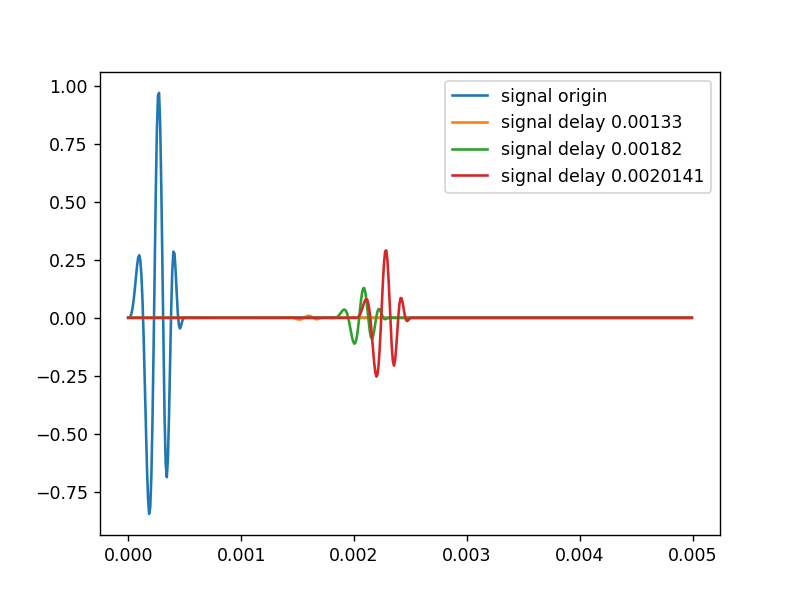

In [16]:
fig, ax = plt.subplots()
ax.plot(time, s_origin, label="signal origin")
ax.plot(time, s_1, label="signal delay {}".format(time_delay_1))
ax.plot(time, s_2, label="signal delay {}".format(time_delay_2))
ax.plot(time, s_3, label="signal delay {}".format(time_delay_3))
ax.legend()

<IPython.core.display.Javascript object>


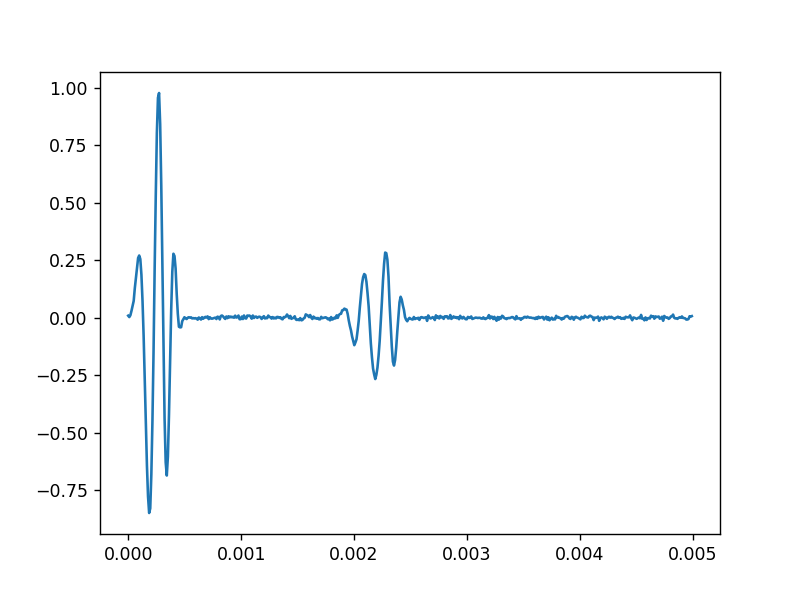

In [17]:
fig, ax = plt.subplots()
ax.plot(time, signal_distorted)

In [9]:
template = window_s
fir_coeff = template[::-1]

<IPython.core.display.Javascript object>


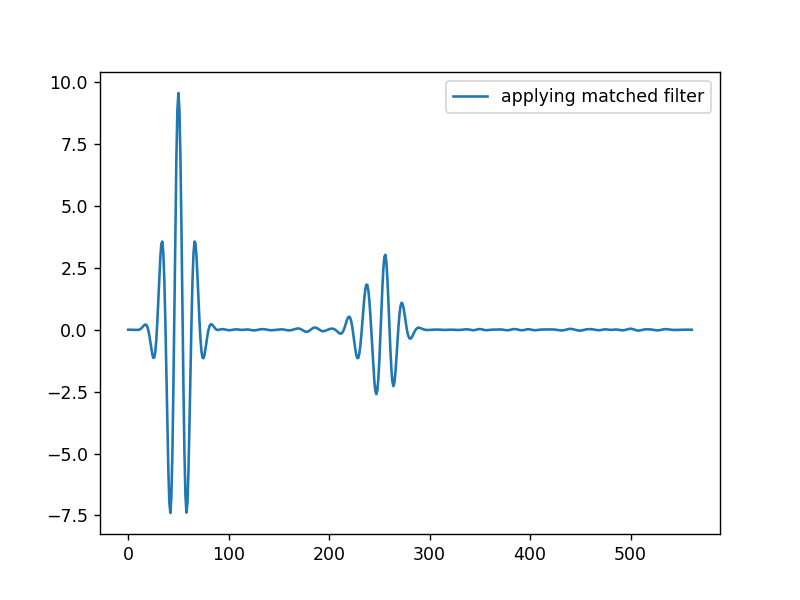

In [18]:
# det_1 = signal.lfilter(fir_coeff, 1, signal_distorted)
det_2 = np.convolve(fir_coeff, signal_distorted, "full")
fig, ax = plt.subplots()
ax.plot(det_2, label="applying matched filter")
ax.legend()

In [19]:
signal_1 = det_2[:100]
arg_1 = np.argmax(signal_1)
signal_2 = det_2[100:200]
arg_2 = np.argmax(signal_2)+100
zero_1 = arg_2-arg_1
zero_1/102400

0.001328125

In [173]:
(0.001328125-0.00133)/0.00133*100

-0.1409774436090168

In [23]:
import math

duration_time = 0.0005
duration_count = int(duration_time*fs)

delay_1 = arg_2-arg_1
target_signal = signal_distorted[delay_1:delay_1+duration_count]
min_power = 10**10

for i in range(1, 100001):
    alpha = 0.00001*i
    estimated_signal = alpha*template
    diff = target_signal - estimated_signal
    power = np.sum(diff*diff)
    if power<min_power:
        estimated_alpha = alpha
        min_power = power
print(estimated_alpha)

0.009380000000000001
